In [85]:
from pandas import Series
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from math import sqrt

os.chdir("C:\PritamData\Stats_With_R\Homework")
# Importing the dataset
dataset = pd.read_csv('order_forecast.csv')

In [86]:
dataset_pa = dataset[dataset["Driver Shift Market"] == "Palo Alto"]
print(dataset_pa.head())

print(dataset_pa.shape)

print(dataset_pa.dtypes)

print(dataset_pa.columns)


    Order Created Day of Week Order Created Date Driver Shift Market  \
526                    Friday         2017-10-06           Palo Alto   
528                  Saturday         2017-10-07           Palo Alto   
533                    Sunday         2017-10-08           Palo Alto   
534                    Monday         2017-10-09           Palo Alto   
539                   Tuesday         2017-10-10           Palo Alto   

     Order Count  
526           17  
528           18  
533           22  
534            9  
539           59  
(297, 4)
Order Created Day of Week    object
Order Created Date           object
Driver Shift Market          object
Order Count                   int64
dtype: object
Index(['Order Created Day of Week', 'Order Created Date',
       'Driver Shift Market', 'Order Count'],
      dtype='object')


In [87]:
dataset_pa['Datetime'] = pd.to_datetime(dataset_pa['Order Created Date'],format='%Y-%m-%d')
dataset_pa['year']=dataset_pa.Datetime.dt.year 
dataset_pa['month']=dataset_pa.Datetime.dt.month 
dataset_pa['day']=dataset_pa.Datetime.dt.day
dataset_pa['day of week']=dataset_pa['Datetime'].dt.dayofweek

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

dataset_pa['weekend'] = dataset_pa['Datetime'].apply(applyer)
dataset_pa.index = dataset_pa['Datetime']

           Order Created Day of Week Order Created Date Driver Shift Market  \
Datetime                                                                      
2017-10-06                    Friday         2017-10-06           Palo Alto   
2017-10-07                  Saturday         2017-10-07           Palo Alto   
2017-10-08                    Sunday         2017-10-08           Palo Alto   
2017-10-09                    Monday         2017-10-09           Palo Alto   
2017-10-10                   Tuesday         2017-10-10           Palo Alto   

            Order Count   Datetime  year  month  day  day of week  weekend  
Datetime                                                                    
2017-10-06           17 2017-10-06  2017     10    6            4        0  
2017-10-07           18 2017-10-07  2017     10    7            5        1  
2017-10-08           22 2017-10-08  2017     10    8            6        1  
2017-10-09            9 2017-10-09  2017     10    9         

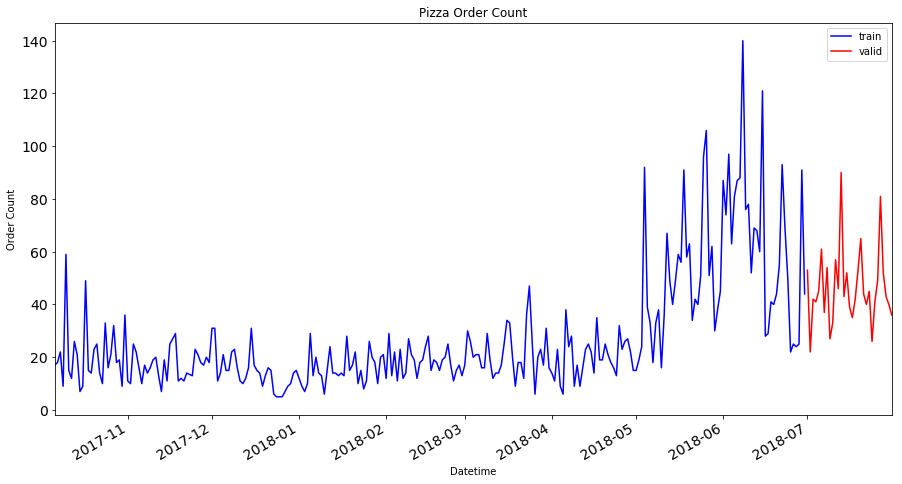

In [88]:
#Split the data set

Train=dataset_pa.ix['2017-10-06':'2018-06-30']
valid=dataset_pa.ix['2018-07-01':'2018-07-31']

print(Train.head())
Train['Order Count'].plot(figsize=(15,8), title= 'Pizza Order Count', fontsize=14, label='train', color='blue')
valid['Order Count'].plot(figsize=(15,8), title= 'Pizza Order Count', fontsize=14, label='valid', color='red')
plt.xlabel("Datetime")
plt.ylabel("Order Count")
plt.legend(loc='best')
plt.show()

Datetime
2017-10-06          NaN
2017-10-07          NaN
2017-10-08    19.000000
2017-10-09    16.333333
2017-10-10    30.000000
2017-10-11    27.666667
2017-10-12    28.666667
2017-10-13    17.666667
2017-10-14    19.666667
2017-10-15    18.000000
Name: MovingAverage, dtype: float64
Index(['Order Created Day of Week', 'Order Created Date',
       'Driver Shift Market', 'Order Count', 'Datetime', 'year', 'month',
       'day', 'day of week', 'weekend', 'MovingAverage'],
      dtype='object')


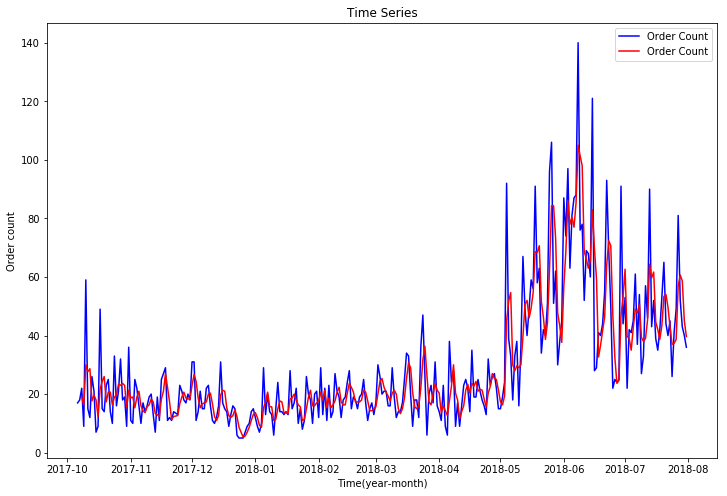

Moving average MSE =  114.442561205


In [89]:
## this is just to see how actual values and moving average plot looks like
temp = dataset_pa.copy()
temp['MovingAverage'] = temp['Order Count'].rolling(window=3).mean()
print(temp['MovingAverage'].head(10))
print(temp.columns)

ts = temp['Order Count']
plt.figure(figsize=(12,8))
plt.plot(temp.index, ts, label='Order Count', color='blue')
plt.plot(temp.index, temp['MovingAverage'], label='Order Count', color='red')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Order count")
plt.legend(loc='best')
plt.show()

#MV error
test1 = temp.iloc[2:,3]  ## row 2 onwards and column 3
test2 = temp.iloc[2:,10]
error = mean_squared_error(test1, test2)
print("Moving average MSE = ", error)

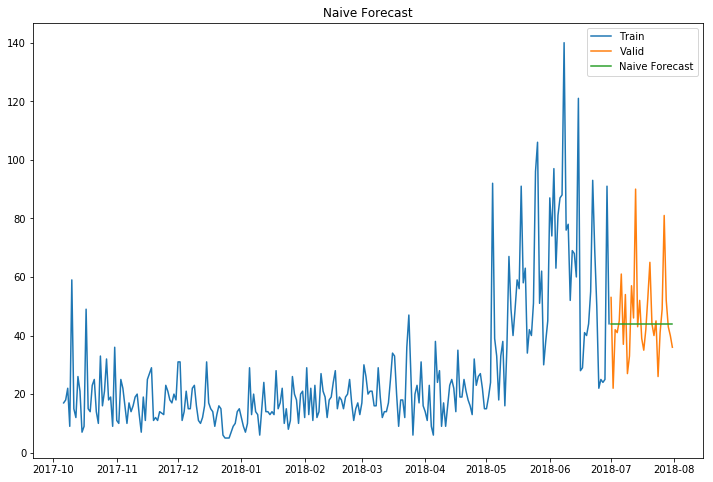

Naive approach RMSE =  14.25799153389583


In [90]:
# 1. predictions using naive approach

dd= np.asarray(Train['Order Count'])
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Order Count'], label='Train')
plt.plot(valid.index, valid['Order Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

rms = sqrt(mean_squared_error(y_hat['Order Count'], y_hat.naive))
print("Naive approach RMSE = ", rms)

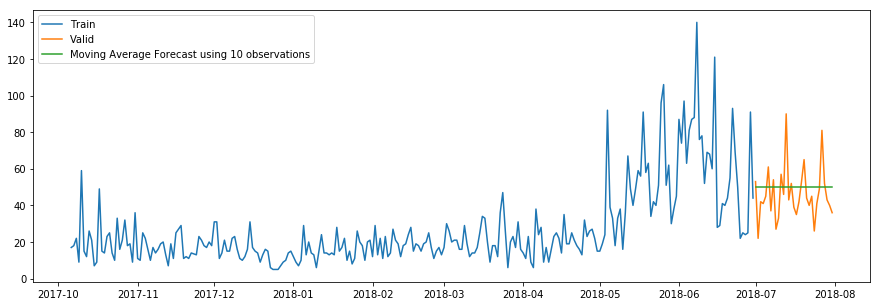

Moving Average RMSE 10 observations =  14.516775612840076


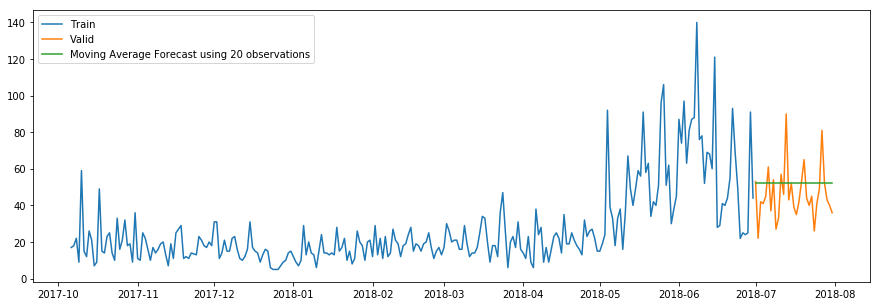

Moving Average RMSE 20 observations =  15.399780057080413


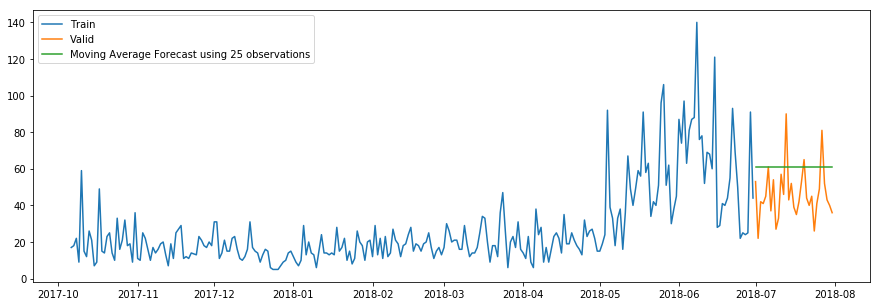

Moving Average RMSE 25 observations =  20.211323558837012


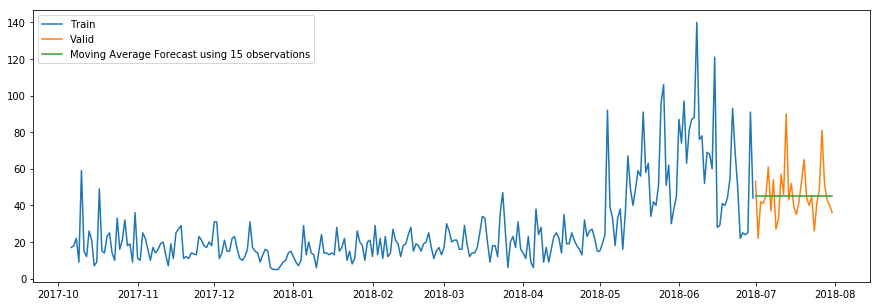

Moving Average RMSE 15 observations =  14.108387398355589


In [91]:
# 2. Moving Average
# In this technique we will take the average of the passenger counts for last few time periods only.
# Lets try the rolling mean for last 10, 20, 25 days and visualize the results.

#Moving Average Forecast using 10 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Order Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(y_hat_avg['Order Count'], y_hat_avg['moving_avg_forecast']))
print("Moving Average RMSE 10 observations = ", rms)

#Moving Average Forecast using 20 observations
y_hat_avg['moving_avg_forecast'] = Train['Order Count'].rolling(20).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(y_hat_avg['Order Count'], y_hat_avg['moving_avg_forecast']))
print("Moving Average RMSE 20 observations = ", rms)

#Moving Average Forecast using 25 observations
y_hat_avg['moving_avg_forecast'] = Train['Order Count'].rolling(25).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 25 observations')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(y_hat_avg['Order Count'], y_hat_avg['moving_avg_forecast']))
print("Moving Average RMSE 25 observations = ", rms)

#Moving Average Forecast using 15 observations
y_hat_avg['moving_avg_forecast'] = Train['Order Count'].rolling(15).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 15 observations')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(y_hat_avg['Order Count'], y_hat_avg['moving_avg_forecast']))
print("Moving Average RMSE 15 observations = ", rms)

So we can see that RMSE is lowest with last 15 observations average values. Lets do forecasting for next 2 weeks using the same.

Datetime
2018-08-10    45.333333
2018-08-11    45.333333
2018-08-12    45.333333
2018-08-13    45.333333
2018-08-14    45.333333
Name: moving_avg_forecast, dtype: float64


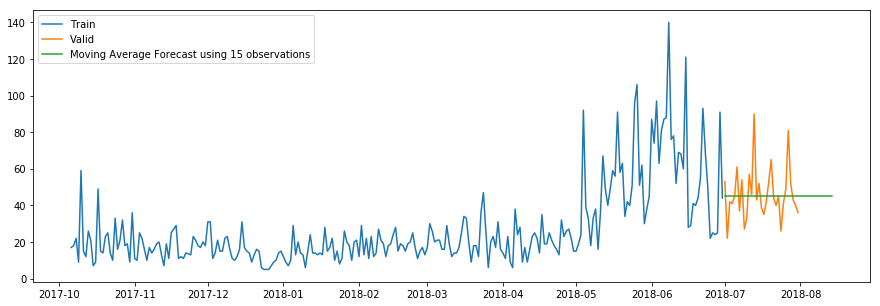

In [92]:
## Forecasting for next 14 days

data = {'Datetime': ['2018-08-01', '2018-08-02','2018-08-03','2018-08-04','2018-08-05','2018-08-06','2018-08-07','2018-08-08',
                '2018-08-09','2018-08-09','2018-08-10','2018-08-11','2018-08-12','2018-08-13','2018-08-14']}
df = pd.DataFrame(data, columns = ['Datetime'])
y_hat_avg = y_hat_avg.append(df, ignore_index=True) 
y_hat_avg.index=y_hat_avg['Datetime']
y_hat_avg['moving_avg_forecast'] = Train['Order Count'].rolling(15).mean().iloc[-1]
print(y_hat_avg['moving_avg_forecast'].tail())

plt.figure(figsize=(15,5)) 
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 15 observations')
plt.legend(loc='best')
plt.show()

Datetime
2018-08-10    52.321152
2018-08-11    52.321152
2018-08-12    52.321152
2018-08-13    52.321152
2018-08-14    52.321152
Name: SES, dtype: float64
Index(['Datetime', 'Driver Shift Market', 'Order Count', 'Order Created Date',
       'Order Created Day of Week', 'day', 'day of week', 'month',
       'moving_avg_forecast', 'weekend', 'year', 'SES', 'Holt_linear'],
      dtype='object')


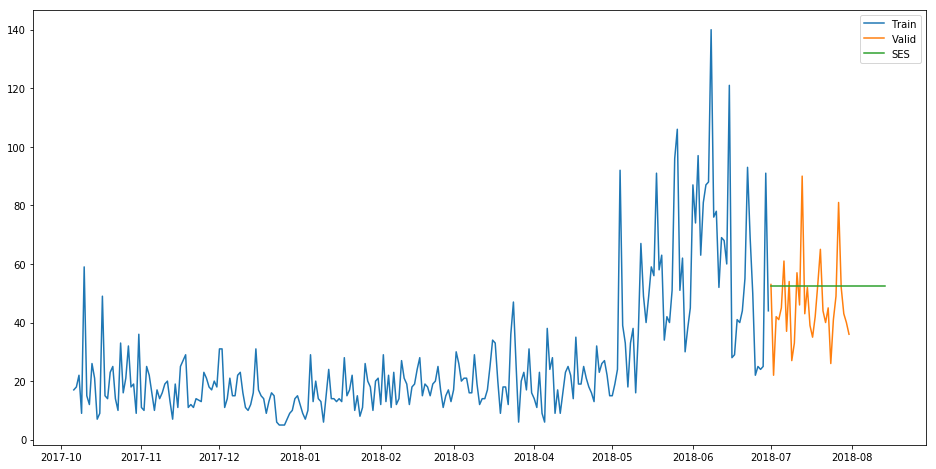

Simple Exp Smoothing RMSE 15.328160307134835


In [101]:
#3. Simple Exponential Smoothing
#In this technique, we assign larger weights to more recent observations than to observations from the distant past.
#The weights decrease exponentially as observations come from further in the past, 
#the smallest weights are associated with the oldest observations.

from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

#y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Order Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(y_hat_avg))
print(y_hat_avg['SES'].tail())
print(y_hat_avg.columns)

plt.figure(figsize=(16,8))
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_hat_avg.iloc[0:31,2], y_hat_avg.iloc[0:31,11]))
print("Simple Exp Smoothing RMSE", rms)

4. Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.

import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train['Order Count']).plot()
result = sm.tsa.stattools.adfuller(Train['Order Count'])
plt.show()

Datetime
2018-08-10    9.876623
2018-08-11    9.053584
2018-08-12    8.230546
2018-08-13    7.407508
2018-08-14    6.584470
Name: Holt_linear, dtype: float64
Index(['Datetime', 'Driver Shift Market', 'Order Count', 'Order Created Date',
       'Order Created Day of Week', 'day', 'day of week', 'month',
       'moving_avg_forecast', 'weekend', 'year', 'SES', 'Holt_linear'],
      dtype='object')


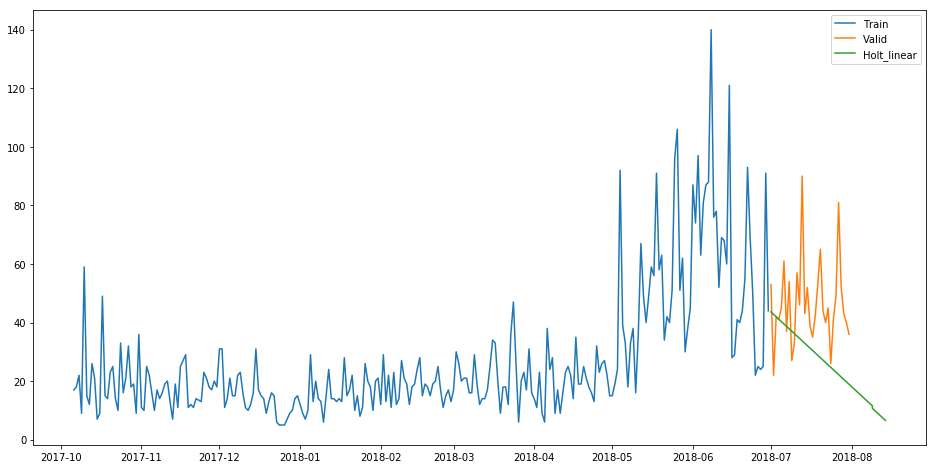

Holt’s RMSE  22.173663181243878


In [100]:
#y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Order Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(y_hat_avg))
print(y_hat_avg['Holt_linear'].tail())
print(y_hat_avg.columns)

plt.figure(figsize=(16,8))
plt.plot(Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_hat_avg.iloc[0:31,2], y_hat_avg.iloc[0:31,12]))
print("Holt’s Linear RMSE ", rms)

Datetime
2018-08-10    9.876623
2018-08-11    9.053584
2018-08-12    8.230546
2018-08-13    7.407508
2018-08-14    6.584470
Name: Holt_linear, dtype: float64
Index(['Datetime', 'Driver Shift Market', 'Order Count', 'Order Created Date',
       'Order Created Day of Week', 'day', 'day of week', 'month',
       'moving_avg_forecast', 'weekend', 'year', 'SES', 'Holt_linear',
       'Holt_Winter'],
      dtype='object')


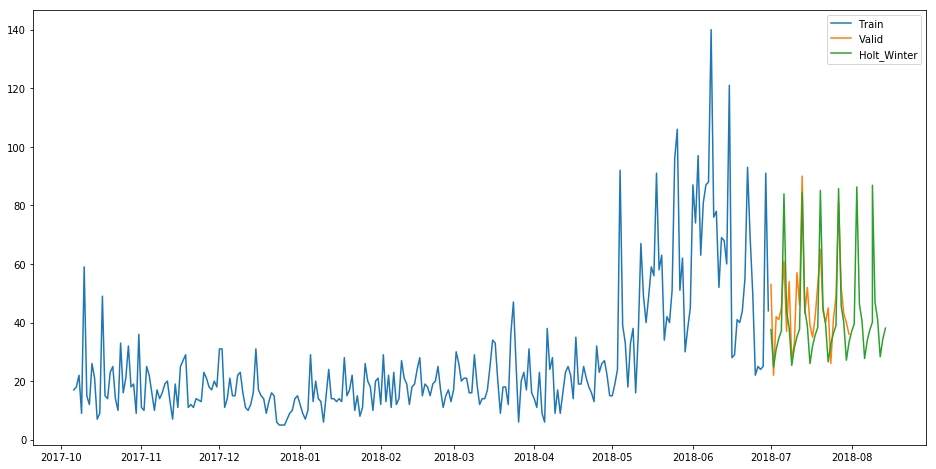

Holt’s Winter RMSE  10.843500771907598


In [105]:
#y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Order Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(y_hat_avg))
print(y_hat_avg['Holt_Winter'].tail())
print(y_hat_avg.columns)

plt.figure(figsize=(16,8))
plt.plot( Train['Order Count'], label='Train')
plt.plot(valid['Order Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(y_hat_avg.iloc[0:31,2], y_hat_avg.iloc[0:31,13]))
print("Holt’s Winter RMSE ", rms)